In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib as plt
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#PART 1: EXTRACTING DATA FROM WEBSITE
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
page = requests.get(url)
page_content = page.content
doc = BeautifulSoup(page_content, 'html.parser')

#INFO FOR THE BODY OF THE DATAFRAME
table = doc.find('table')
rows = table.find_all("tr")
body = []
for tr in rows:
    td = tr.find_all("td")
    line = [row.get_text() for row in td]
    body.append(line)
body.pop(0)
body.pop(-1)
body_copy = body.copy()

#COLUMN FOR 'RANK'
rank = []
for i in range (1,101):
    rank.append(i)
    
    
col_1 = []
col_2 = []
col_3 = []
col_4 = []
col_5 = []
for lyst in body_copy:
    col_1.append(lyst[0])
    col_2.append(lyst[1])
    col_3.append(lyst[2])
    col_4.append(lyst[3])
    col_5.append(lyst[4])
num_type = []
for word in col_4:
    num_type.append(int(word.replace(',','')))
col_4 = num_type
col_4 = [word*1000000 for word in col_4]

col_5 = [date.replace("\n","")for date in col_5]


col_1 = [song.replace("\'","") for song in col_1]
        
#INFO FOR HEADER
header = []
th = table.find_all("th")
for row in th[:6]:
    header.append(row.get_text().replace("\n",''))
header = [word.replace("Streams(millions)", "Streams")  for word in header]

In [3]:
pandas_set_up = {header[0]:rank,header[1]:col_1,header[2]:col_2,header[3]:col_3,header[4]:col_4,header[5]:col_5}

df = DataFrame(pandas_set_up)
df["album/artist(s)"] =  df["Album"] + " by " + df["Artist(s)"]
df["song/artist(s)"] = df["Song"] + " by " + df["Artist(s)"]
df

,Rank,Song,Artist(s),Album,Streams,Date published,album/artist(s),song/artist(s)
0,1,"""Shape of You""",Ed Sheeran,÷,2543000000,6 January 2017,÷ by Ed Sheeran,"""Shape of You"" by Ed Sheeran"
1,2,"""Rockstar""",Post Malone featuring 21 Savage,Beerbongs & Bentleys,1955000000,15 September 2017,Beerbongs & Bentleys by Post Malone featuring ...,"""Rockstar"" by Post Malone featuring 21 Savage"
2,3,"""One Dance""",Drake featuring Wizkid and Kyla,Views,1880000000,5 April 2016,Views by Drake featuring Wizkid and Kyla,"""One Dance"" by Drake featuring Wizkid and Kyla"
3,4,"""Closer""",The Chainsmokers featuring Halsey,Collage,1809000000,29 July 2016,Collage by The Chainsmokers featuring Halsey,"""Closer"" by The Chainsmokers featuring Halsey"
4,5,"""Dance Monkey""",Tones and I,The Kids Are Coming,1685000000,10 May 2019,The Kids Are Coming by Tones and I,"""Dance Monkey"" by Tones and I"
...,...,...,...,...,...,...,...,...
95,96,"""Rockabye""",Clean Bandit featuring Sean Paul and Anne-Marie,What Is Love? & Speak Your Mind,999000000,21 October 2016,What Is Love? & Speak Your Mind by Clean Bandi...,"""Rockabye"" by Clean Bandit featuring Sean Paul..."
96,97,"""Mi Gente""",J Balvin and Willy William,Vibras,997000000,30 June 2017,Vibras by J Balvin and Willy William,"""Mi Gente"" by J Balvin and Willy William"
97,98,"""Ride""",Twenty One Pilots,Blurryface,989000000,17 May 2015,Blurryface by Twenty One Pilots,"""Ride"" by Twenty One Pilots"
98,99,"""Dont Start Now""",Dua Lipa,Future Nostalgia,987000000,1 November 2019,Future Nostalgia by Dua Lipa,"""Dont Start Now"" by Dua Lipa"


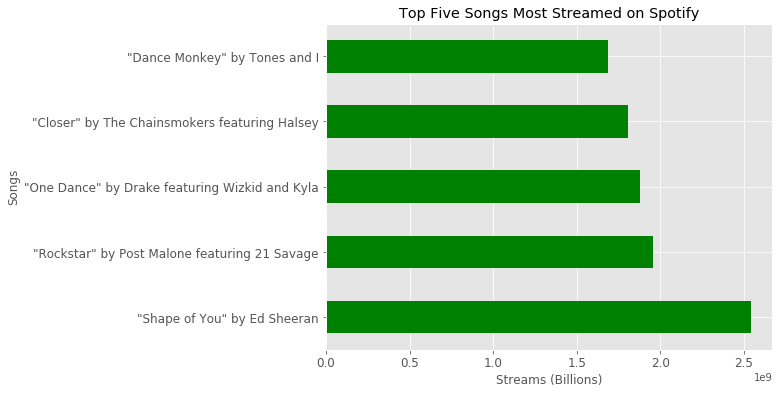

In [4]:
#TOP 5 MOST STREAMED SONGS GRAPH
top_5 = df.set_index("song/artist(s)")
top_5_plot = top_5["Streams"].iloc[:5]
ax = top_5_plot.plot.barh(figsize=(8,6), fontsize=12, color = "g")
ax.set_xlabel("Streams (Billions)")
ax.set_ylabel("Songs")
ax.set_title("Top Five Songs Most Streamed on Spotify")
None

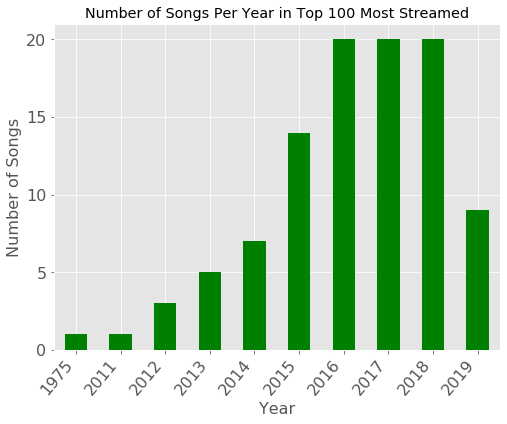

In [5]:
#YEAR PUBLISHED PLOT
def plot_dict(d, xlabel, ylabel, title,low,high,interval):
    ax = pd.Series(d).sort_index().plot.bar(fontsize=16, yticks = range(low,high,interval),figsize=(8,6),color = "g")
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50,horizontalalignment='right')
    
def year_published(data):
    df = data
    date = df["Date published"]
    year = [int(num[-4:]) for num in date]
    release_year = {}
    for y in year:
        if y not in release_year:
            release_year[y] = 0
        release_year[y] += 1
    plot_dict(release_year, "Year","Number of Songs","Number of Songs Per Year in Top 100 Most Streamed",
             0,25,5)
year_published(df)

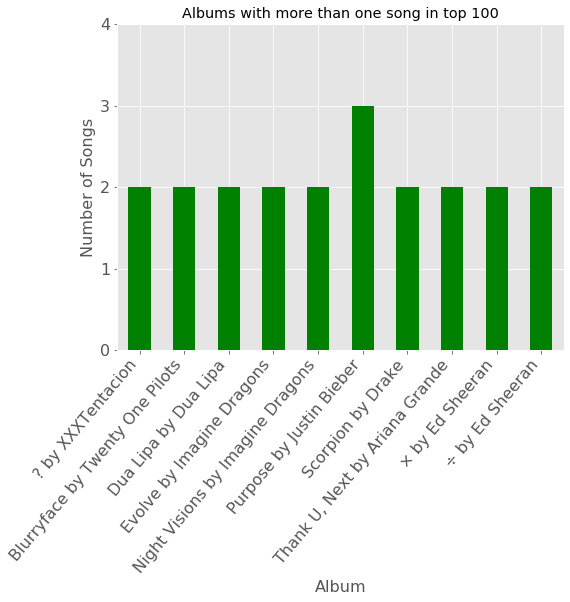

In [6]:
#ALBUM GRAPH 
def album_top_5(data):
    df = data
    album = df["album/artist(s)"]
    album_list = [word for word in album]
    album_dict = {}
    for i in album_list:
        if i not in album_dict:
            album_dict[i] = 0
        album_dict[i] += 1
    album_dict = {key:value for key,value in album_dict.items() if value != 1}
    plot_dict(album_dict, "Album","Number of Songs","Albums with more than one song in top 100",0,5,1)
    
album_top_5(df)